### Load all disgenet GDA data
> all_gene_disease_associations.tsv can be obtained from https://www.disgenet.org/downloads

In [3]:
import requests

# URL of the file to download
url = "http://www.disgenet.org/static/disgenet_ap1/files/downloads/all_gene_disease_associations.tsv.gz"

# Send a GET request to the URL
response = requests.get(url)

# Make sure the request was successful
assert response.status_code == 200

# Write the content of the response to a file
with open("all_gene_disease_associations.tsv.gz", "wb") as file:
    file.write(response.content)


In [74]:
import pandas as pd

# Using '\t' as the delimiter because the file appears to be a TSV (Tab-separated values) file.
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/all_gene_disease_associations.tsv', delimiter='\t', error_bad_lines=False)

# Rest of your code
num_unique_diseaseId = df['diseaseId'].nunique()
num_unique_geneId = df['geneId'].nunique()
print(f"Number of unique 'diseaseDes': {num_unique_diseaseId}")
print(f"Number of unique 'proteinSeq': {num_unique_geneId}")
len(df)

Number of unique 'diseaseDes': 30170
Number of unique 'proteinSeq': 21671


1134942

In [45]:
df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_updated.csv')
df.head(5)

,diseaseId,geneSymbol,proteinSeq,diseaseDes,score
0,C0019196,ACP2,NaN,NaN,NaN
1,C0022578,ACP2,NaN,NaN,NaN
2,C0026709,ACP2,NaN,NaN,NaN
3,C0026827,ACP2,NaN,NaN,NaN
4,C0042963,ACP2,NaN,NaN,NaN


In [66]:
import pandas as pd
df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_latest.csv')
num_unique_diseaseId = df['diseaseDes'].nunique()
num_unique_geneId = df['proteinSeq'].nunique()
print(f"Number of unique 'diseaseDes': {num_unique_diseaseId}")
print(f"Number of unique 'proteinSeq': {num_unique_geneId}")
len(df)

Number of unique 'diseaseDes': 28873
Number of unique 'proteinSeq': 16622


1041587

In [40]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_latest.csv')

# 移除缺失proteinSeq的行
df = df[df['proteinSeq'].notna()]

# 获取与diseaseId C0002395相关的diseaseDes
desired_diseaseId = 'C0002395'
desired_diseaseDes = df[df['diseaseId'] == desired_diseaseId]['diseaseDes'].iloc[0]

# 获取与diseaseDes相关的proteinSeq
related_proteins = df[df['diseaseDes'] == desired_diseaseDes]['proteinSeq'].unique()

# 为每个proteinSeq和geneSymbol组合确定Y值
df['Y'] = df['proteinSeq'].isin(related_proteins).astype(int)

# 创建一个新的DataFrame来储存结果
new_df = pd.DataFrame({
    'diseaseId': desired_diseaseId,
    'diseaseDes': desired_diseaseDes,
    'geneSymbol': df['geneSymbol'],
    'proteinSeq': df['proteinSeq'],
    'Y': df['Y']
})

# 去除重复项并重置索引
new_df = new_df.drop_duplicates().reset_index(drop=True)

new_df.head()
new_df.to_csv('Alzheimer_disease.csv', index=False)

,diseaseId,diseaseDes,geneSymbol,proteinSeq,Y
0,C0002395,Alzheimer's disease is a degenerative disease ...,A1BG,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,0
1,C0002395,Alzheimer's disease is a degenerative disease ...,A2M,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,1
2,C0002395,Alzheimer's disease is a degenerative disease ...,NAT1,MLLLLLHKEAALEPQGPAVGYNSLPVSDDHHVSGIQARKKQQSVFW...,1
3,C0002395,Alzheimer's disease is a degenerative disease ...,NAT2,MDIEAYFERIGYKNSRNKLDLETLTDILEHQIRAVPFENLNMHCGQ...,1
4,C0002395,Alzheimer's disease is a degenerative disease ...,SERPINA3,MERMLPLLALGLLAAGFCPAVLCHPNSPLDEENLTQENQDRGTHVD...,1


In [87]:
import pandas as pd
df=pd.read_csv('/nfs/dpa_pretrain/data/downstream/alzheimer_new.csv')
y_counts = df['Y'].value_counts()
count_Y_0 = y_counts.get(0, 0)
count_Y_1 = y_counts.get(1, 0)

print(f"Count for Y=0: {count_Y_0}")
print(f"Count for Y=1: {count_Y_1}")

Count for Y=0: 3083
Count for Y=1: 3083


In [44]:
new_df.to_csv('Alzheimer_disease.csv', index=False)

In [41]:
len(new_df)

16733

In [17]:
import pandas as pd
from itertools import product

# Load data from CSV files
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_latest.csv')
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_gda.csv')

# Filter rows with diseaseId = C0002395 and non-empty diseaseDes and proteinSeq
filtered_df = df[(df['diseaseId'] == 'C0699791') & df['diseaseDes'].notna() & df['proteinSeq'].notna()]
filtered_df_g = df_g[(df_g['diseaseId'] == 'C0699791') & df_g['diseaseDes'].notna() & df_g['proteinSeq'].notna()]

# Print the number of rows
print(f"Number of entries in disgenet_latest.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: {len(filtered_df)}")
print(f"Number of entries in disgenet_gda.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: {len(filtered_df_g)}")

# Extract unique disease descriptions and protein sequences
disease_des_stomach = filtered_df['diseaseDes'].unique()
unique_proteinSeq_from_latest = df[df['proteinSeq'].notna()]['proteinSeq'].unique()
unique_proteinSeq_from_gda = filtered_df_g['proteinSeq'].unique()

# Filter out proteinSeq that appear in disgenet_gda.csv
unique_proteinSeq = [seq for seq in unique_proteinSeq_from_latest if seq not in unique_proteinSeq_from_gda]

# # Create all possible diseaseDes - proteinSeq pairs, keeping geneSymbol and geneId
# pairs = []
# for des in disease_des_stomach:
#     for seq in unique_proteinSeq:
#         row = filtered_df[filtered_df['proteinSeq'] == seq].iloc[0] if seq in filtered_df['proteinSeq'].values else None
#         geneSymbol = row['geneSymbol'] if row is not None else 'NA'
#         geneId = row['geneId'] if row is not None else 'NA'
#         pairs.append([des, seq, 0, geneSymbol, geneId])  # Y initialized to 0

# Create a DataFrame with the pairs
result_df = pd.DataFrame(pairs, columns=['diseaseDes', 'proteinSeq', 'Y', 'geneSymbol', 'geneId'])
result_df['Y'] = 0
# result_df = pd.DataFrame(pairs, columns=['diseaseDes', 'proteinSeq', 'geneSymbol', 'geneId'])
# Save the DataFrame to a CSV file
result_df.to_csv('updated_stomach.csv', index=False)

Number of entries in disgenet_latest.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: 3076
Number of entries in disgenet_gda.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: 2954


In [38]:
import pandas as pd

# Load data from CSV files
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_latest.csv')
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_gda.csv')

# Filter rows with diseaseId = C0699791 and non-empty diseaseDes and proteinSeq
filtered_df = df[(df['diseaseId'] == 'C0699791') & df['diseaseDes'].notna() & df['proteinSeq'].notna()]
filtered_df_g = df_g[(df_g['diseaseId'] == 'C0699791') & df_g['diseaseDes'].notna() & df_g['proteinSeq'].notna()]

# Extract all unique gene symbols from disgenet_gda.csv with diseaseId = C0699791
gene_symbols_to_exclude = filtered_df_g['geneSymbol'].unique()

# Extract all unique protein sequences and corresponding gene symbols from disgenet_latest.csv
unique_proteins_and_symbols = df[df['proteinSeq'].notna()][['proteinSeq', 'geneSymbol']].drop_duplicates()

# Exclude rows where geneSymbol appears in gene_symbols_to_exclude
unique_proteins_and_symbols_filtered = unique_proteins_and_symbols[~unique_proteins_and_symbols['geneSymbol'].isin(gene_symbols_to_exclude)]

# Create all possible diseaseDes - proteinSeq pairs, keeping geneSymbol and geneId
pairs = []
for des in filtered_df['diseaseDes'].unique():
    for _, row in unique_proteins_and_symbols_filtered.iterrows():
        seq, geneSymbol = row['proteinSeq'], row['geneSymbol']
        geneId = filtered_df.loc[filtered_df['geneSymbol'] == geneSymbol, 'geneId'].iloc[0] if geneSymbol in filtered_df['geneSymbol'].values else 'NA'
        Y_value = 1 if seq in filtered_df['proteinSeq'].values else 0
        pairs.append([des, seq, Y_value, geneSymbol, geneId])

# Create a DataFrame with the pairs
result_df = pd.DataFrame(pairs, columns=['diseaseDes', 'proteinSeq', 'Y', 'geneSymbol', 'geneId'])

# Count the number of rows where Y = 1
count_Y_equals_1 = result_df[result_df['Y'] == 1].shape[0]

print(f"Number of rows where Y = 1: {count_Y_equals_1}")

# Save the DataFrame to a CSV file
result_df.to_csv('stomach.csv', index=False)

Number of rows where Y = 1: 134


In [39]:
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/stomach.csv')
# df_g.head(5)
len(df_g)

13788

In [40]:
df_g.head(5)

,diseaseDes,proteinSeq,Y,geneSymbol,geneId
0,A malignant epithelial tumor of the stomach mu...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,0,A1BG,NaN
1,A malignant epithelial tumor of the stomach mu...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0,A2M,NaN
2,A malignant epithelial tumor of the stomach mu...,MERMLPLLALGLLAAGFCPAVLCHPNSPLDEENLTQENQDRGTHVD...,0,SERPINA3,NaN
3,A malignant epithelial tumor of the stomach mu...,MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNL...,0,AADAC,NaN
4,A malignant epithelial tumor of the stomach mu...,MESESESGAAADTPPLETLSFHGDEEIIEVVELDPGPPDPADDLAQ...,0,AAMP,NaN


In [41]:
import pandas as pd

# Load data from CSV files
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_latest.csv')
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_gda.csv')

# Filter rows with diseaseId = C0002395 and non-empty diseaseDes and proteinSeq
filtered_df = df[(df['diseaseId'] == 'C0002395') & df['diseaseDes'].notna() & df['proteinSeq'].notna()]
filtered_df_g = df_g[(df_g['diseaseId'] == 'C0002395') & df_g['diseaseDes'].notna() & df_g['proteinSeq'].notna()]

# Extract all unique gene symbols from disgenet_gda.csv with diseaseId = C0699791
gene_symbols_to_exclude = filtered_df_g['geneSymbol'].unique()

# Extract all unique protein sequences and corresponding gene symbols from disgenet_latest.csv
unique_proteins_and_symbols = df[df['proteinSeq'].notna()][['proteinSeq', 'geneSymbol']].drop_duplicates()

# Exclude rows where geneSymbol appears in gene_symbols_to_exclude
unique_proteins_and_symbols_filtered = unique_proteins_and_symbols[~unique_proteins_and_symbols['geneSymbol'].isin(gene_symbols_to_exclude)]

# Create all possible diseaseDes - proteinSeq pairs, keeping geneSymbol and geneId
pairs = []
for des in filtered_df['diseaseDes'].unique():
    for _, row in unique_proteins_and_symbols_filtered.iterrows():
        seq, geneSymbol = row['proteinSeq'], row['geneSymbol']
        geneId = filtered_df.loc[filtered_df['geneSymbol'] == geneSymbol, 'geneId'].iloc[0] if geneSymbol in filtered_df['geneSymbol'].values else 'NA'
        Y_value = 1 if seq in filtered_df['proteinSeq'].values else 0
        pairs.append([des, seq, Y_value, geneSymbol, geneId])

# Create a DataFrame with the pairs
result_df = pd.DataFrame(pairs, columns=['diseaseDes', 'proteinSeq', 'Y', 'geneSymbol', 'geneId'])

# Count the number of rows where Y = 1
count_Y_equals_1 = result_df[result_df['Y'] == 1].shape[0]

print(f"Number of rows where Y = 1: {count_Y_equals_1}")

# Save the DataFrame to a CSV file
result_df.to_csv('alzheimer.csv', index=False)

Number of rows where Y = 1: 183


In [42]:
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/alzheimer.csv')
len(df_g)

13833

In [43]:
df_g.head(5)

,diseaseDes,proteinSeq,Y,geneSymbol,geneId
0,Alzheimer's disease is a degenerative disease ...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,0,A1BG,NaN
1,Alzheimer's disease is a degenerative disease ...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,1,A2M,2.0
2,Alzheimer's disease is a degenerative disease ...,MERMLPLLALGLLAAGFCPAVLCHPNSPLDEENLTQENQDRGTHVD...,1,SERPINA3,12.0
3,Alzheimer's disease is a degenerative disease ...,MGRKSLYLLIVGILIAYYIYTPLPDNVEEPWRMMWINAHLKTIQNL...,0,AADAC,NaN
4,Alzheimer's disease is a degenerative disease ...,MESESESGAAADTPPLETLSFHGDEEIIEVVELDPGPPDPADDLAQ...,0,AAMP,NaN


In [76]:
import pandas as pd

# 从两个CSV文件中读取数据
df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_latest.csv')
df_g = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_gda.csv')

# 找到 diseaseId = C0699791 且 diseaseDes 和 proteinSeq 不为空的行
filtered_df = df[(df['diseaseId'] == 'C0699791') & df['proteinSeq'].notna()]
filtered_df_g = df_g[(df_g['diseaseId'] == 'C0699791')& df_g['proteinSeq'].notna()]

# 打印出数量
print(f"Number of entries in disgenet_latest.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: {len(filtered_df)}")
print(f"Number of entries in disgenet_gda.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: {len(filtered_df_g)}")

Number of entries in disgenet_latest.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: 3076
Number of entries in disgenet_gda.csv for diseaseId = C0699791 with non-empty diseaseDes and proteinSeq: 2954


In [ ]:
import pandas as pd

# Read the CSV files
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_latest.csv')
df_g = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/disgenet_gda.csv')

# Merge the two DataFrames using an outer join based on the "geneId" and "diseaseId" columns
merged_df = pd.merge(df, df_g, on=['geneSymbol', 'diseaseId'], how='outer', indicator=True)

# Filter the merged DataFrame to keep only the rows that are present in one DataFrame but not in the other
differences_df = merged_df[merged_df['_merge'] != 'both']

# Save the differences to a CSV file
differences_df.to_csv('/nfs/dpa_pretrain/notebooks/data_processing/differences.csv', index=False)

In [ ]:
df = pd.read_csv('/nfs/dpa_pretrain/notebooks/data_processing/differences.csv')
df.head()

In [ ]:
len(df)

In [17]:
import pandas as pd
df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/differences.csv')
len(df)

83688

In [ ]:
import pandas as pd

# 读取两个文件
df_diff = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/differences.csv')
df_disgenet = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_latest.csv')

# 根据diseaseId列进行匹配
merged = pd.merge(df_diff, df_disgenet, on='diseaseId', how='inner')

# 选择需要的列
result = merged[['diseaseId', 'proteinSeq', 'diseaseDes', 'score']]

# 保存到新的文件中
result.to_csv('/nfs/dpa_pretrain/data/pretrain/differences_updated.csv', index=False)


In [ ]:
import pandas as pd

# Read file 1
df1 = pd.read_csv('gene_associations.tsv', sep="\t")
print(f"the number of gene: {len(df1.index)}")

# Read file 2
df2 = pd.read_csv('disease_associations.tsv', sep="\t")
print(f"the number of disease: {len(df2.index)}")

# Concatenate the dataframes along the columns
df = pd.concat([df1, df2], axis=1)

# # Save merged file
# df.to_csv('all_gene_disease_associations.tsv', index=False)

In [13]:
df1 = pd.read_csv('gene_associations.tsv', sep="\t")
df1.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids
0,1,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27,20
1,2,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147,145
2,3,A2MP1,NaN,NaN,NaN,NaN,NaN,1,1
3,9,NAT1,0.536,0.846,1.929400e-14,Enzyme,DTO_05007624,133,184
4,10,NAT2,0.451,0.885,3.274400e-06,Enzyme,DTO_05007624,311,627


In [2]:
df1.columns

Index(['geneId', 'geneSymbol', 'DSI', 'DPI', 'PLI', 'protein_class_name',
       'protein_class', 'NofDiseases', 'NofPmids'],
      dtype='object')

In [3]:
df2.columns

Index(['diseaseId', 'diseaseName', 'diseaseType', 'diseaseClass',
       'diseaseSemanticType', 'NofGenes', 'NofPmids'],
      dtype='object')

In [4]:
df2.head(3)

,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,NofGenes,NofPmids
0,C0000727,"Abdomen, Acute",phenotype,C23,Sign or Symptom,2,2
1,C0000729,Abdominal Cramps,phenotype,C16,Sign or Symptom,1,1
2,C0000731,Abdomen distended,phenotype,C06,Finding,103,0


Found local copy...
Loading...
Done!
Binariztion using threshold 0, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


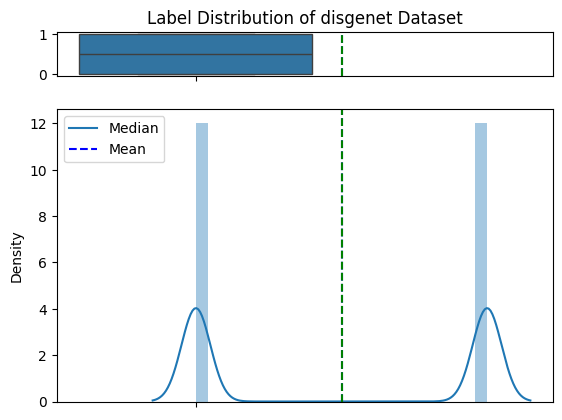

The number of common diseases: 7095


In [ ]:
import torch
from tdc.multi_pred import GDA
import numpy as np
import pandas as pd

# Load the data
data = GDA(name="DisGeNET")
data.neg_sample(frac = 1)
data.binarize(threshold = 0, order = 'ascending')
data.label_distribution()
tdc_df = data.get_data()

# tdc_df.to_csv('TDC_pn.csv', index=False)
# Load CSV file
df2 = pd.read_csv('disease_associations.tsv', sep="\t")

# Get the set of disease IDs from both datasets
tdc_disease_ids = set(tdc_df['Disease_ID'])
df2_disease_ids = set(df2['diseaseId'])

# Get the intersection of the two sets, which gives us the common diseases
common_diseases = tdc_disease_ids.intersection(df2_disease_ids)

print(f"The number of common diseases: {len(common_diseases)}")


In [2]:
# Create a new dataframe that only contains the 'diseaseId' and 'diseaseClass' columns from df2
df2_reduced = df2[['diseaseId', 'diseaseClass']]
df3_reduced = df2[['diseaseId', 'diseaseClass']]

# Rename the 'diseaseId' column in df2_reduced to 'Disease_ID' so it can be merged with tdc_df
df2_reduced = df2_reduced.rename(columns={'diseaseId': 'Disease_ID'})
df3_reduced = df3_reduced.rename(columns={'diseaseId': 'Disease_ID'})

# Merge tdc_df with df2_reduced, keeping only the rows where the 'Disease_ID' is present in both dataframes
merged_df = pd.merge(tdc_df, df2_reduced, on='Disease_ID')
merged_df = pd.merge(tdc_df, df3_reduced, on='Disease_ID')
# Now, merged_df contains the 'diseaseClass' for each 'Disease_ID' that is present in both the TDC dataset and your dataset
merged_df.head(3)


,Gene_ID,Gene,Disease_ID,Disease,Y,diseaseClass
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,1,C23;C06
1,196,MNSSSANITYASRKRRKPVQKTVKPIPAEGIKSNPSKRHRDRLNTE...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,1,C23;C06
2,213,MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,1,C23;C06


In [69]:
# Select rows where Disease_ID equals 'C0009375'
desired_disease_df = merged_df[merged_df['Disease_ID'] == 'C0002395']

# Select rows where Disease_ID does not equal 'C0009375'
other_diseases_df = merged_df[merged_df['Disease_ID'] != 'C0002395']

# Save the dataframes to CSV files
# desired_disease_df.to_csv('Alzheimer.csv', index=False)
# other_diseases_df.to_csv('Non_Alzheimer.csv', index=False)


In [7]:
# Select rows where Disease_ID equals 'C0009375'
desired_disease_df = merged_df[merged_df['Disease_ID'] == 'C0002395']

# Get the disease name corresponding to 'C0009375'
desired_disease_name = desired_disease_df['Disease'].values[0]

# Select rows where Disease_ID does not equal 'C0009375'
other_diseases_df = merged_df[merged_df['Disease_ID'] != 'C0002395']

# Replace the Disease_ID and Disease in other_diseases_df with the desired values
other_diseases_df.loc[:, 'Disease_ID'] = 'C0002395'
other_diseases_df.loc[:, 'Disease'] = desired_disease_name

# Set Y value to 0 in other_diseases_df
other_diseases_df.loc[:, 'Y'] = 0

# Concatenate the dataframes
final_df = pd.concat([desired_disease_df, other_diseases_df])

# Save the dataframe to a CSV file
final_df.to_csv('final_Alzheimer.csv', index=False)


In [75]:
# Create a new dataframe containing only rows where 'diseaseClass' contains 'F01'
F01_df = merged_df[merged_df['diseaseClass'].str.contains('F01', na=False)]

In [76]:
# Save the DataFrame to a CSV file
F01_df.to_csv('F01_diseases.csv', index=False)

In [77]:
# Create a new dataframe containing only rows where 'diseaseClass' contains 'F01'
F03_df = merged_df[merged_df['diseaseClass'].str.contains('F03', na=False)]
# Save the DataFrame to a CSV file
F03_df.to_csv('F03_diseases.csv', index=False)

In [78]:
# Create a new dataframe containing only rows where 'diseaseClass' contains 'F01'
C01_df = merged_df[merged_df['diseaseClass'].str.contains('C01', na=False)]
# Save the DataFrame to a CSV file
C01_df.to_csv('C01_diseases.csv', index=False)

In [79]:
# The list of diseaseClass codes to include
codes = ['C{:02d}'.format(i) for i in range(4, 27)]

# Loop through the codes
for code in codes:
    # Create a new dataframe containing only rows where 'diseaseClass' contains the current code
    df = merged_df[merged_df['diseaseClass'].str.contains(code, na=False)]
    
    # Save the DataFrame to a CSV file
    df.to_csv('{}_diseases.csv'.format(code), index=False)

In [14]:
# Create a new dataframe containing only rows where 'diseaseClass' contains 'F01'
C26_df = merged_df[merged_df['diseaseClass'].str.contains('C26', na=False)]
# Save the DataFrame to a CSV file
C26_df.to_csv('C26_diseases.csv', index=False)

In [80]:
# Group by 'Disease_ID' and count non-NaN 'diseaseClass' for each group
disease_class_counts = merged_df.groupby('Disease_ID')['diseaseClass'].count()

# Find 'Disease_ID' where all 'diseaseClass' are NaN
diseases_with_all_nan_class = disease_class_counts[disease_class_counts == 0].index.tolist()

len(diseases_with_all_nan_class)

1481

In [81]:
nan_df = merged_df[merged_df['diseaseClass'].isna()]

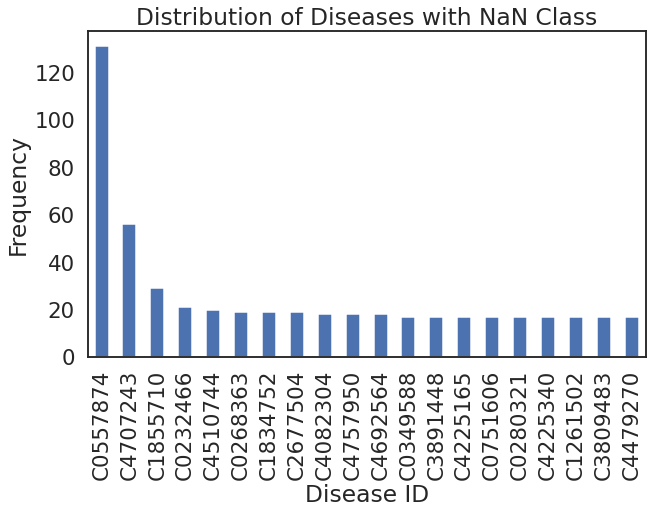

In [82]:
# Compute the frequency of each 'Disease_ID'
counts = nan_df['Disease_ID'].value_counts()

# Select the top 20 diseases
top_20_diseases = counts[:20]

# Plot the frequencies
plt.figure(figsize=(10, 6))
top_20_diseases.plot(kind='bar')
plt.title('Distribution of Diseases with NaN Class')
plt.xlabel('Disease ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [83]:
len(nan_df)

12902

In [5]:
import torch
from tdc.multi_pred import GDA
import numpy as np
import pandas as pd
merged_df = pd.read_csv('/nfs/dpa_pretrain/data/pretrain/disgenet_updated.csv')
desired_disease_id = 'C0002395'
disease_row = merged_df[merged_df['diseaseId'] == desired_disease_id]

# Extract the disease name
# disease_name = disease_row['NofGenes'].values[0]  # If there could be multiple rows, this will get the disease name from the first row

# print(f"The disease name for Disease_ID {desisred_disease_id} is {disease_name}")

In [6]:
len(disease_row)

191

In [8]:
nan_df = disease_row[disease_row['proteinSeq'].isna()]

In [10]:
nan_df

,diseaseId,geneSymbol,proteinSeq,diseaseDes,score
16,C0002395,AMD1,NaN,NaN,NaN
101,C0002395,AQP4,NaN,NaN,NaN
405,C0002395,GPX1,NaN,NaN,NaN
703,C0002395,MDH1,NaN,NaN,NaN
747,C0002395,MPZ,NaN,NaN,NaN
979,C0002395,OPRK1,NaN,NaN,NaN
1110,C0002395,OPRL1,NaN,NaN,NaN
1181,C0002395,MAPK10,NaN,NaN,NaN
1263,C0002395,VDR,NaN,NaN,NaN
4175,C0002395,CCL4L1,NaN,NaN,NaN


In [ ]:
desired_disease_id = 'C0002395'
disease_row = merged_df[merged_df['Disease_ID'] == desired_disease_id]

# Extract the disease name
disease_name = disease_row['Disease'].values[0]  # If there could be multiple rows, this will get the disease name from the first row

print(f"The disease name for Disease_ID {desired_disease_id} is {disease_name}")

In [59]:
desired_disease_id = 'C0009375'
disease_row = merged_df[merged_df['Disease_ID'] == desired_disease_id]

# Extract the disease name
disease_name = disease_row['Disease'].values[0]  # If there could be multiple rows, this will get the disease name from the first row

print(f"The disease name for Disease_ID {desired_disease_id} is {disease_name}")

The disease name for Disease_ID C0009375 is Colonic Neoplasms: A benign or malignant neoplasm that affects the colon. Representative examples of benign neoplasms include lipoma and leiomyoma. Representative examples of malignant neoplasms include carcinoma, lymphoma, and sarcoma. Colonic adenomas always exhibit epithelial dysplasia and are considered premalignant neoplasms.


In [60]:
len(disease_row)

135

In [276]:
nan_df.head()

,Gene_ID,Gene,Disease_ID,Disease,Y,diseaseClass
6015,18,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...,C0557874,Global developmental delay: A delay in the ach...,0.4,NaN
6016,86,MSGGVYGGDEVGALVFDIGSYTVRAGYAGEDCPKVDFPTAIGMVVE...,C0557874,Global developmental delay: A delay in the ach...,0.3,NaN
6017,162,MTDSKYFTTTKKGEIFELKAELNSDKKEKKKEAVKKVIASMTVGKD...,C0557874,Global developmental delay: A delay in the ach...,0.3,NaN
6018,318,MALRACGLIIFRRCLIPKVDNNAIEFLLLQASDGIHHWTPPKGHVE...,C0557874,Global developmental delay: A delay in the ach...,0.3,NaN
6019,652,MIPGNRMLMVVLLCQVLLGGASHASLIPETGKKKVAEIQGHAGGRR...,C0557874,Global developmental delay: A delay in the ach...,0.4,NaN


In [8]:
# Find rows where 'diseaseClass' contains both 'C' and 'F'
CF_df = merged_df[merged_df['diseaseClass'].str.contains('C', na=False) & merged_df['diseaseClass'].str.contains('F', na=False)]

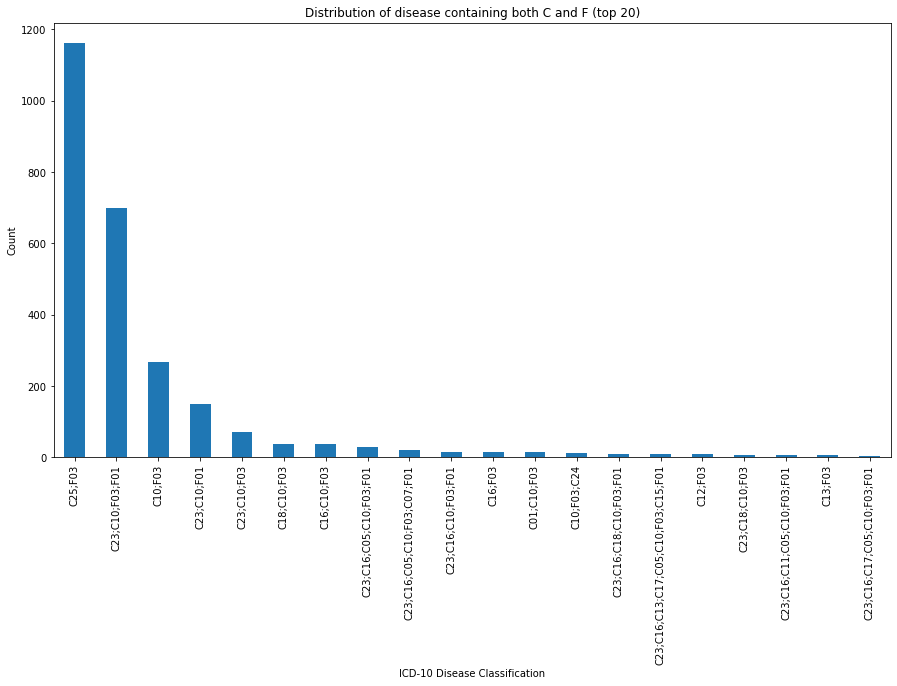

In [14]:
import matplotlib.pyplot as plt
# Plot the frequencies and unique Disease_ID counts
plt.figure(figsize=(15, 8))

# We'll use a colormap to have nice color gradations
cmap = plt.get_cmap("tab20c")

# Increase global font size
plt.rcParams['font.size'] = 10
# Compute the frequency of each 'diseaseClass' in CF_df
counts = CF_df['diseaseClass'].value_counts()
# Select the top 20 diseases
top_20_diseases = counts[:20]

top_20_diseases.plot(kind='bar')
plt.title('Distribution of disease containing both C and F (top 20)')
plt.xlabel('ICD-10 Disease Classification', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [283]:
len(CF_df)

2690

In [280]:
len(merged_df)

52476

In [90]:
# 找到 'diseaseClass' 包含 'F' 的所有行
C_df = merged_df[merged_df['diseaseClass'].str.contains('C', na=False)]

# Save the dataframe to a CSV file
C_df.to_csv('C_diseases.csv', index=False)

In [91]:
len(C_df)

87883

### F01
Vascular dementia
Vascular dementia is the result of infarction of the brain due to vascular disease, including hypertensive cerebrovascular disease. The infarcts are usually small but cumulative in their effect. Onset is usually in later life.

Incl.:
arteriosclerotic dementia
F01.0
Vascular dementia of acute onset
Usually develops rapidly after a succession of strokes from cerebrovascular thrombosis, embolism or haemorrhage. In rare cases, a single large infarction may be the cause.

F01.1
Multi-infarct dementia
Gradual in onset, following a number of transient ischaemic episodes which produce an accumulation of infarcts in the cerebral parenchyma.

Predominantly cortical dementia
F01.2
Subcortical vascular dementia
Includes cases with a history of hypertension and foci of ischaemic destruction in the deep white matter of the cerebral hemispheres. The cerebral cortex is usually preserved and this contrasts with the clinical picture which may closely resemble that of dementia in Alzheimer disease.

F01.3
Mixed cortical and subcortical vascular dementia
F01.8
Other vascular dementia
F01.9
Vascular dementia, unspecified

### F03
Unspecified dementia
Incl.:
Presenile:
dementia NOS
psychosis NOS
Primary degenerative dementia NOS

Senile:
dementia:
NOS
depressed or paranoid type
psychosis NOS
Use additional code, if desired, to indicate delirium or acute confusional state superimposed on dementia.

Excl.:
senility NOS (R54)

In [248]:
# 找到 'diseaseClass' 包含 'D' 的所有行
D_df = merged_df[merged_df['diseaseClass'].str.contains('D', na=False)]

In [249]:
len(D_df)

0

In [ ]:
C_df = merged_df[merged_df['diseaseClass'].str.contains('C', na=False)]

In [254]:
len(C_df)

47058

In [266]:
C_df = merged_df[merged_df['diseaseClass'].str.contains('C', na=False)]

# Save the dataframe to a CSV file
C_df.to_csv('C_diseases.csv', index=False)

### C04

Malignant neoplasm of floor of mouth
C04.0

Anterior floor of mouth
Anterior to the premolar-canine junction

C04.1
Lateral floor of mouth

C04.8
Overlapping lesion of floor of mouth

C04.9
Floor of mouth, unspecified

In [288]:
C_df = merged_df[merged_df['diseaseClass'].str.contains('C04', na=False)]

# Save the dataframe to a CSV file
#C_df.to_csv('C_diseases.csv', index=False)

In [289]:
len(C_df)

18922

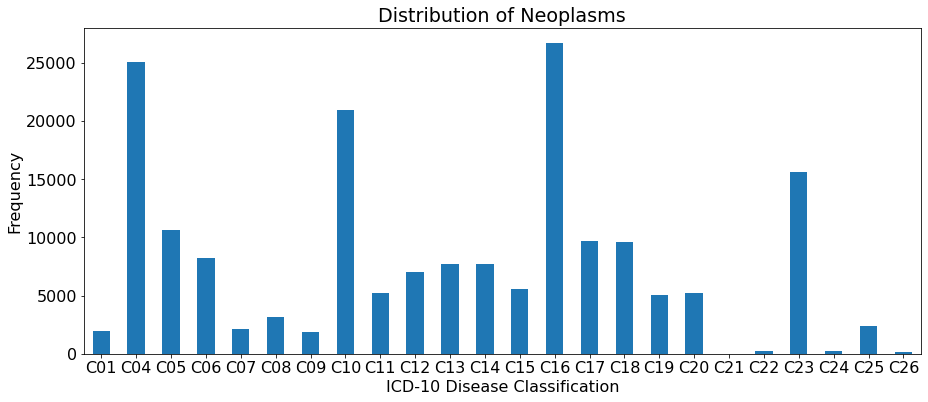

In [10]:
import re
from collections import Counter

# Define a function to extract all 'C' followed by two digits from a string
def extract_disease_classes(disease_class):
    if isinstance(disease_class, str):
        return re.findall(r'C\d{2}', disease_class)
    return []

# Extract all 'C' followed by two digits from each row
disease_classes = merged_df['diseaseClass'].apply(extract_disease_classes)

# Flatten the list of lists and create a Counter object
counts = Counter([item for sublist in disease_classes for item in sublist])

# Convert the Counter object to a pandas Series
counts_series = pd.Series(counts).sort_index()

# Plot the frequencies
plt.figure(figsize=(15, 6))
counts_series.plot(kind='bar')
plt.title('Distribution of Neoplasms')
plt.xlabel('ICD-10 Disease Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

## Certain infectious and parasitic diseases(A00-B99)

In [97]:
# Define the range of letters and numbers
letters_numbers = [letter + str(i).zfill(2) for letter in ['A', 'B'] for i in range(100)] 
letters_numbers = letters_numbers[:-51]  # Remove 'D49' to 'D99'

# Filter the dataframe
one = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

# Save the dataframe to a CSV file
#filtered_df.to_csv('A00_B99_diseases.csv', index=False)


In [98]:
len(one)

0

## Neoplasms(C00-D48)

In [229]:
# Define the range of letters and numbers
letters_numbers = [letter + str(i).zfill(2) for letter in ['C', 'D'] for i in range(100)] 
letters_numbers = letters_numbers[:-51]  # Remove 'D49' to 'D99'

# Filter the dataframe
two = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

# Save the dataframe to a CSV file
two.to_csv('C00_D48_diseases.csv', index=False)

In [100]:
len(two)

15066

In [101]:
two.head(3)

,Gene_ID,Gene,Disease_ID,Disease,Y,diseaseClass
1832,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0024115,Lung diseases: A non-neoplastic or neoplastic ...,0.32,C08
1833,151,MDHQDPYSVQATAAIAAAITFLILFTIFGNALVILAVLTSRSLRAP...,C0024115,Lung diseases: A non-neoplastic or neoplastic ...,0.32,C08
1834,976,MGGRVFLAFCVWLTLPGAETQDSRGCARWCPQNSSCVNATACRCNP...,C0024115,Lung diseases: A non-neoplastic or neoplastic ...,0.30,C08


### Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
(D50-D89)

In [102]:
# Define the range of letters and numbers
letters_numbers = ['D' + str(i).zfill(2) for i in range(50, 90)]  # Generate codes from 'D50' to 'D89'

# Filter the dataframe
three = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

# Save the dataframe to a CSV file
# filtered_df.to_csv('D50_D89_diseases.csv', index=False)

In [103]:
len(three)

0

### Endocrine, nutritional and metabolic diseases
(E00-E90)

In [104]:
# Define the range of letters and numbers
letters_numbers = ['E' + str(i).zfill(2) for i in range(91)]  # Generate codes from 'E00' to 'E90'

# Filter the dataframe
four = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

# Save the dataframe to a CSV file
# filtered_df.to_csv('E00_E90_diseases.csv', index=False)


In [105]:
len(four)

0

### Mental and behavioural disorders
(F00-F99)

In [230]:
# Define the range of letters and numbers
letters_numbers = ['F' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
five = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

# Save the dataframe to a CSV file
two.to_csv('F00_F99_diseases.csv', index=False)

In [231]:
len(five)

3467

### Diseases of the nervous system
(G00-G99)

In [108]:
# Define the range of letters and numbers
letters_numbers = ['G' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
six = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [109]:
len(six)

0

### Diseases of the eye and adnexa
(H00-H59)

In [110]:
# Define the range of letters and numbers
letters_numbers = ['H' + str(i).zfill(2) for i in range(60)]  

# Filter the dataframe
seven = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [111]:
len(seven)

0

### Diseases of the ear and mastoid process
(H60-H95)

In [112]:
# Define the range of letters and numbers
letters_numbers = ['H' + str(i).zfill(2) for i in range(60, 96)]  
# Filter the dataframe
eight = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [113]:
len(eight)

0

### Diseases of the circulatory system
(I00-I99)

In [114]:
# Define the range of letters and numbers
letters_numbers = ['I' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
nine = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [115]:
len(nine)

0

### Diseases of the respiratory system
(J00-J99)

In [116]:
# Define the range of letters and numbers
letters_numbers = ['J' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
ten = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [117]:
len(ten)

0

### Diseases of the digestive system
(K00-K93)

In [118]:
# Define the range of letters and numbers
letters_numbers = ['J' + str(i).zfill(2) for i in range(94)]  

# Filter the dataframe
eleven = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [119]:
len(eleven)

0

### Diseases of the skin and subcutaneous tissue
(L00-L99)

In [120]:
# Define the range of letters and numbers
letters_numbers = ['L' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
twelve = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [121]:
len(twelve)

0

### Diseases of the musculoskeletal system and connective tissue
(M00-M99)

In [122]:
# Define the range of letters and numbers
letters_numbers = ['M' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
thirteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [123]:
len(thirteen)

0

### Diseases of the genitourinary system
(N00-N99)

In [124]:
# Define the range of letters and numbers
letters_numbers = ['N' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
fourteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [125]:
len(fourteen)

0

### Pregnancy, childbirth and the puerperium
(O00-O99)

In [126]:
# Define the range of letters and numbers
letters_numbers = ['O' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
fiveteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [127]:
len(fiveteen)

0

### Certain conditions originating in the perinatal period
(P00-P96)

In [128]:
# Define the range of letters and numbers
letters_numbers = ['P' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
sixteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [129]:
len(sixteen)

0

### Congenital malformations, deformations and chromosomal abnormalities
(Q00-Q99)

In [130]:
# Define the range of letters and numbers
letters_numbers = ['Q' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
seventeen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [131]:
len(seventeen)

0

### Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
(R00-R99)

In [132]:
# Define the range of letters and numbers
letters_numbers = ['R' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
eighteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [133]:
len(eighteen)

0

### Injury, poisoning and certain other consequences of external causes
(S00-T98)

In [134]:
# Define the range of letters and numbers
letters_numbers = [letter + str(i).zfill(2) for letter in ['S', 'T'] for i in range(100)] 

# Filter the dataframe
nineteen = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [135]:
len(nineteen)

0

### External causes of morbidity and mortality
(V01-Y98)

In [136]:
# Define the range of letters and numbers
letters_numbers = [letter + str(i).zfill(2) for letter in ['V', 'Y'] for i in range(100)] 

# Filter the dataframe
twenty = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [137]:
len(twenty)

0

### Factors influencing health status and contact with health services
(Z00-Z99)

In [138]:
# Define the range of letters and numbers
letters_numbers = ['Z' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
twenty_one = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [139]:
len(twenty_one)

0

### Codes for special purposes
(U00-U85)

In [140]:
# Define the range of letters and numbers
letters_numbers = ['U' + str(i).zfill(2) for i in range(100)]  

# Filter the dataframe
twenty_two = merged_df[merged_df['diseaseClass'].apply(lambda x: x in letters_numbers if isinstance(x, str) else False)]

In [141]:
len(twenty_two)

0

### Load all disgenet GDA data
> all_gene_disease_associations.tsv can be obtained from https://www.disgenet.org/downloads

In [27]:
import pandas as pd

all_gda_df = pd.read_csv("all_gene_disease_associations.tsv")
all_gda_df.head()

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,NofGenes,NofPmids.1
0,1.0,A1BG,0.700,0.538,4.991700e-09,Receptor,DTO_05007575,27.0,20.0,C0000727,"Abdomen, Acute",phenotype,C23,Sign or Symptom,2,2
1,2.0,A2M,0.529,0.769,4.522900e-11,Enzyme modulator,DTO_05007584,147.0,145.0,C0000729,Abdominal Cramps,phenotype,C16,Sign or Symptom,1,1
2,3.0,A2MP1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,C0000731,Abdomen distended,phenotype,C06,Finding,103,0
3,9.0,NAT1,0.536,0.846,1.929400e-14,Enzyme,DTO_05007624,133.0,184.0,C0000734,Abdominal mass,phenotype,C06,Finding,2,0
4,10.0,NAT2,0.451,0.885,3.274400e-06,Enzyme,DTO_05007624,311.0,627.0,C0000735,Abdominal Neoplasms,group,C04,Neoplastic Process,13,13


In [29]:
all_gda_df = all_gda_df[
    ["geneId", "geneSymbol", "DSI", "DPI", "diseaseId", "diseaseName"]
]  # Get needed columns
all_gda_df.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName
0,1.0,A1BG,0.700,0.538,C0000727,"Abdomen, Acute"
1,2.0,A2M,0.529,0.769,C0000729,Abdominal Cramps
2,3.0,A2MP1,NaN,NaN,C0000731,Abdomen distended
3,9.0,NAT1,0.536,0.846,C0000734,Abdominal mass
4,10.0,NAT2,0.451,0.885,C0000735,Abdominal Neoplasms


In [30]:
all_gda_df.geneSymbol.nunique(), all_gda_df.diseaseId.nunique()

(21666, 30170)

### Create disease to disease_description mapping from MGDEF of DisGenNet
> MGDEF.csv can be obtained from https://ftp.ncbi.nlm.nih.gov/pub/medgen/

In [4]:
disease_def_df = pd.read_csv("MGDEF.csv")
disease_def_df.head()
disease_des_dict = {}
for _, item in all_gda_df.iterrows():
    disease_des_dict[item["diseaseId"]] = item[
        "diseaseName"
    ]  ## Default disease description is disease name
for _, item in disease_def_df.iterrows():
    disease_des_dict[item["CUI"]] = item["DEF"]

### Map CUI to Disease Description

In [5]:
all_gda_df["diseaseDes"] = all_gda_df["diseaseId"].map(lambda x: disease_des_dict[x])

In [6]:
# with open("gene_symbol.txt",'w') as f: # This is a gene_symbol use to retrieval in https://www.uniprot.org/uploadlists/
#     f.write(" ".join(all_gda_df['geneSymbol'].unique()))

### Create gene to gene_protein_seq mapping from STRING

In [31]:
prot_info_df = pd.read_csv("9606.protein.info.v12.0.txt", "\t")
prot_info_gene = prot_info_df["preferred_name"].unique()
prot_info_df["preferred_name"].nunique()

19563

In [32]:
prot_info_df.head(3)

,#string_protein_id,preferred_name,protein_size,annotation
0,9606.ENSP00000000233,ARF5,180,ADP-ribosylation factor 5; GTP-binding protein...
1,9606.ENSP00000000412,M6PR,277,Cation-dependent mannose-6-phosphate receptor;...
2,9606.ENSP00000001008,FKBP4,459,Peptidyl-prolyl cis-trans isomerase FKBP4; Imm...


In [37]:
# Check overlapping between all_gda_df and string
not_exist = []
exist_gene = []
for gene_name in all_gda_df["geneSymbol"].unique():
    if gene_name not in prot_info_gene:
        not_exist.append(gene_name)
    else:
        exist_gene.append(gene_name)
with open("gene_exist_in_STRING.txt", "w") as f:
    f.write(" ".join(exist_gene))
with open("gene_exist_NOT_in_STRING.txt", "w") as f:
    f.write(" ".join(not_exist))
len(not_exist), len(exist_gene)

TypeError: sequence item 5756: expected str instance, float found

### Filter out all the association according to gene_exist_in_STRING.txt
> 9606.protein.sequences.v11.5.fa can be obtained from https://string-db.org/cgi/download?sessionId=bznr4eHEqnC5

In [10]:
print(f"the number of gda: {len(all_gda_df.index)}")

the number of gda: 1134942


In [11]:
all_gda_df_filtered = all_gda_df[
    all_gda_df.geneSymbol.isin(exist_gene)
]  ## Filter by exist_gene

In [12]:
# create protein to seqence mapping

# with open("9606.protein.sequences.v11.5.fa") as f:
with open("gencode.v44.pc_translations.fa") as f:
    lines = f.readlines()
    line_str = "".join(lines)
id_seq_str_list = line_str.split(">")
prot_id_to_seq = {}
for id_seq_str in id_seq_str_list:
    tokens = id_seq_str.split("\n")
    key = tokens[0]
    val = "".join(tokens[1:])
    prot_id_to_seq[key] = val

In [13]:
## Create gene to protein sequence mapping
gene_to_seq_dict = {}
no_seq_gene_list = (
    []
)  ## gene name and protein id cannot find in the prot String dataset
multi_seq_gene_list = (
    []
)  ## gene name and protein id cannot find in the prot String dataset

for _, item in prot_info_df.iterrows():
    gene_name = item["preferred_name"]
    if gene_name in exist_gene:
        protein_id = item["#string_protein_id"]
        gene_to_seq_dict[gene_name] = prot_id_to_seq[protein_id]
        if (gene_name in gene_to_seq_dict) and (
            prot_id_to_seq[protein_id] != gene_to_seq_dict[gene_name]
        ):
            multi_seq_gene_list.append(gene_name)
    else:
        no_seq_gene_list.append(gene_name)

In [14]:
len(no_seq_gene_list), len(multi_seq_gene_list)

(3656, 0)

In [15]:
final_gene_name_list = gene_to_seq_dict.keys()
all_gda_df_filtered = all_gda_df[all_gda_df.geneSymbol.isin(final_gene_name_list)]
len(gene_to_seq_dict)  ## Final gene to seq mapping

15910

In [16]:
# map gene to protein sequence
all_gda_df_filtered["proteinSeq"] = all_gda_df_filtered["geneSymbol"].apply(
    lambda x: gene_to_seq_dict[x]
)
all_gda_df_filtered

/tmp/ipykernel_101603/1325574237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_gda_df_filtered["proteinSeq"] = all_gda_df_filtered["geneSymbol"].apply(lambda x: gene_to_seq_dict[x])


,geneId,geneSymbol,DSI,DPI,score,diseaseId,diseaseName,diseaseDes,proteinSeq
0,1,A1BG,0.700,0.538,0.01,C0001418,Adenocarcinoma,A common cancer characterized by the presence ...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
1,1,A1BG,0.700,0.538,0.01,C0002736,Amyotrophic Lateral Sclerosis,A neurodegenerative disease characterized by p...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
2,1,A1BG,0.700,0.538,0.01,C0003578,Apnea,Lack of breathing with no movement of the resp...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
3,1,A1BG,0.700,0.538,0.01,C0003864,Arthritis,Inflammation of a joint.,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
4,1,A1BG,0.700,0.538,0.01,C0008373,Cholesteatoma,Cholesteatoma is a benign but potentially dest...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
...,...,...,...,...,...,...,...,...,...
1132776,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0344395,Bilirubin measurement,Bilirubin measurement,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
1132777,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0410702,Adolescent idiopathic scoliosis,A scoliosis with no known cause arising in ado...,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
1132778,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0489786,Height,Height,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
1132779,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C1287365,Bilirubin level result,Bilirubin level result,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...


In [17]:
all_gda_df_filtered.to_csv("disgenet_all.csv")

In [3]:
df_full = pd.read_csv("disgenet_all.csv")

In [26]:
def get_pair_idx(item, col1="geneId", col2="diseaseId"):
    pair_idx = str(item[col1]).strip() + "-" + item[col2].strip() 
    return pair_idx
df_full["pair_idx"] = df_full.apply(get_pair_idx, axis=1)

In [27]:
df_full

,Unnamed: 0,Unnamed: 0.1,geneId,geneSymbol,DSI,DPI,score,diseaseId,diseaseName,diseaseDes,proteinSeq,pair_idx
0,0,0,1,A1BG,0.700,0.538,0.01,C0001418,Adenocarcinoma,A common cancer characterized by the presence ...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,1-C0001418
1,1,1,1,A1BG,0.700,0.538,0.01,C0002736,Amyotrophic Lateral Sclerosis,A neurodegenerative disease characterized by p...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,1-C0002736
2,2,2,1,A1BG,0.700,0.538,0.01,C0003578,Apnea,Lack of breathing with no movement of the resp...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,1-C0003578
3,3,3,1,A1BG,0.700,0.538,0.01,C0003864,Arthritis,Inflammation of a joint.,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,1-C0003864
4,4,4,1,A1BG,0.700,0.538,0.01,C0008373,Cholesteatoma,Cholesteatoma is a benign but potentially dest...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,1-C0008373
...,...,...,...,...,...,...,...,...,...,...,...,...
1018350,1019922,1132776,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0344395,Bilirubin measurement,Bilirubin measurement,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...,115072896-C0344395
1018351,1019923,1132777,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0410702,Adolescent idiopathic scoliosis,A scoliosis with no known cause arising in ado...,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...,115072896-C0410702
1018352,1019924,1132778,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0489786,Height,Height,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...,115072896-C0489786
1018353,1019925,1132779,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C1287365,Bilirubin level result,Bilirubin level result,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...,115072896-C1287365


In [29]:
import pandas as pd
def get_pair_idx(item, col1="ID1", col2="ID2"):
    pair_idx = str(item[col1]).strip() + "-" + item[col2].strip() 
    return pair_idx
df = pd.read_csv("disgenet.csv")
df["pair_idx"] = df.apply(get_pair_idx, axis=1)

In [32]:
df

,Unnamed: 0,ID1,X1,ID2,X2,Y,pair_idx
0,0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30,1-C0019209
1,1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30,1-C0036341
2,2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50,2-C0002395
3,3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31,2-C0007102
4,4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30,2-C0009375
...,...,...,...,...,...,...,...
52471,52471,100507436,MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...,C0029172,Oral Submucous Fibrosis: Irreversible FIBROSIS...,0.31,100507436-C0029172
52472,52472,100507436,MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...,C2239176,Liver carcinoma: Hepatocellular carcinoma is t...,0.40,100507436-C2239176
52473,52473,100820829,MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...,C0087031,Juvenile-Onset Still Disease: An inflammatory ...,0.30,100820829-C0087031
52474,52474,100820829,MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...,C3495559,Juvenile arthritis: Juvenile arthritis (JUVAR)...,0.30,100820829-C3495559


In [33]:
df_full.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'geneId', 'geneSymbol', 'DSI', 'DPI',
       'score', 'diseaseId', 'diseaseName', 'diseaseDes', 'proteinSeq',
       'pair_idx'],
      dtype='object')

In [38]:
pair_idx = df.pair_idx.to_numpy()
df_full = df_full[~df_full.pair_idx.isin(pair_idx)][['geneId', 'geneSymbol', 'DSI', 'DPI',
       'score', 'diseaseId', 'diseaseName', 'diseaseDes', 'proteinSeq']]

In [39]:
df_full.to_csv("disgenet_all.csv",index=None)

In [7]:
!pwd

/nfs/protbert/notebooks/data_processing


In [14]:
import pandas as pd
df_full = pd.read_csv("../../data/pretrain/disgenet_gda.csv")
df_full

,geneId,geneSymbol,DSI,DPI,score,diseaseId,diseaseName,diseaseDes,proteinSeq
0,1,A1BG,0.700,0.538,0.01,C0001418,Adenocarcinoma,A common cancer characterized by the presence ...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
1,1,A1BG,0.700,0.538,0.01,C0002736,Amyotrophic Lateral Sclerosis,A neurodegenerative disease characterized by p...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
2,1,A1BG,0.700,0.538,0.01,C0003578,Apnea,Lack of breathing with no movement of the resp...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
3,1,A1BG,0.700,0.538,0.01,C0003864,Arthritis,Inflammation of a joint.,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
4,1,A1BG,0.700,0.538,0.01,C0008373,Cholesteatoma,Cholesteatoma is a benign but potentially dest...,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...
...,...,...,...,...,...,...,...,...,...
966876,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0344395,Bilirubin measurement,Bilirubin measurement,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
966877,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0410702,Adolescent idiopathic scoliosis,A scoliosis with no known cause arising in ado...,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
966878,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C0489786,Height,Height,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...
966879,115072896,SLCO1B3-SLCO1B7,0.839,0.077,0.10,C1287365,Bilirubin level result,Bilirubin level result,MDQHQHLNKTAESASSEKKKTRRCNGFKMFLAALSFSYIAKALGGI...


/root/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


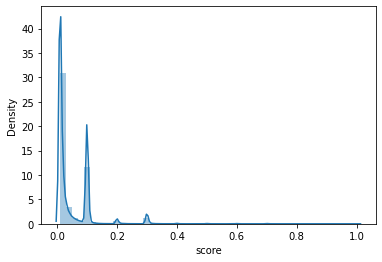

In [15]:
import seaborn as sns, numpy as np
ax = sns.distplot(df_full["score"])